In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Assuming 'encoding' contains the detected encoding from chardet
encoding = 'Windows-1252'  # replace this with the detected encoding

# Read the CSV file with the detected encoding
df = pd.read_csv('spamdataset.csv', encoding=encoding)

# Display the first few rows of the dataframe
print(df.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
 df.rename(columns={"v1":"target", "v2":"text"}, inplace=True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df["target"]=encoder.fit_transform(df["target"])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df=df.drop_duplicates(keep="first")

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

## EDA(exploratory data analysis)

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()      #target is used here so that we can calculate the number of spams and non spam messages

target
0    4516
1     653
Name: count, dtype: int64

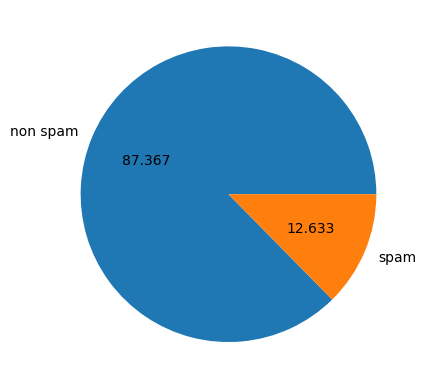

In [19]:
plt.pie(df['target'].value_counts(), labels=['non spam', 'spam'], autopct='%0.3f')   #autopct is to denote the percentage on the piechart, 0.3 indicates that the percentage will be shown till three decimal places
plt.show()

In [20]:
#now we will analyse the number of letters, words, sentences in our messages, basically tokenization
import nltk       #Natural language toolkit
nltk.download('punkt')           #punkt is a pre-trained model used for tokenizing text into sentences and words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df["num_characters"]=df['text'].apply(len)

C:\Users\harja\AppData\Local\Temp\ipykernel_18868\3429107188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_characters"]=df['text'].apply(len)


In [22]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\harja\AppData\Local\Temp\ipykernel_18868\1118471538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [23]:
df['num_sen']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\harja\AppData\Local\Temp\ipykernel_18868\427732136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sen']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [24]:
df.head()

,target,text,num_characters,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['num_characters', 'num_words', 'num_sen']].describe()

,num_characters,num_words,num_sen
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
df[df['target']==0][['num_characters','num_words','num_sen']].describe()

,num_characters,num_words,num_sen
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
df[df['target']==1][['num_characters','num_words','num_sen']].describe()     #spam

,num_characters,num_words,num_sen
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


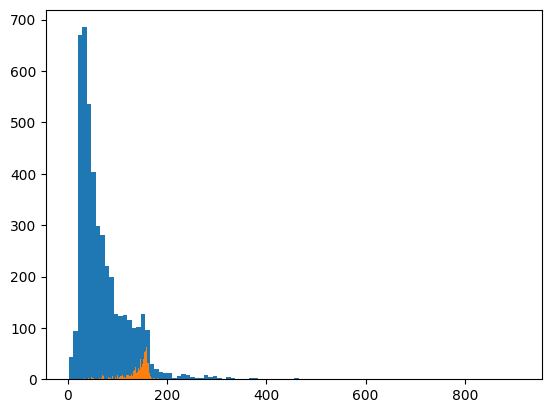

In [28]:
plt.hist(df[df['target']==0]['num_characters'], bins=100)     #ham
plt.hist(df[df['target']==1]['num_characters'], bins=100)     #spam
plt.show()

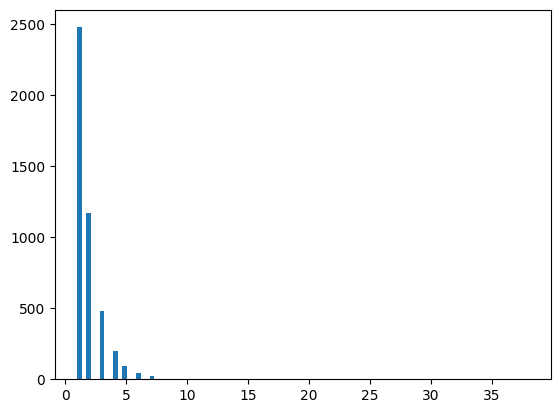

In [29]:
plt.hist(df[df['target']==0]['num_sen'], bins=100)
plt.show()

In [30]:
subset=df[['target','num_characters','num_words','num_sen']]
subset.corr()

,target,num_characters,num_words,num_sen
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sen,0.263939,0.624139,0.679971,1.000000


In [31]:
df

,target,text,num_characters,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


## Data Preprocessing
lower case

tokenization

removing special characters

removing stop words(is, of, the etc) and punctuation

stemming(dance, dances, danced, dancing all these words mean dance only so we will convert all 
these words into 'dance')


In [32]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [33]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [34]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [37]:
transform_text("I loved the YT lectures on Machine Learning. How about you?")

'love yt lectur machin learn'

In [38]:
a=df['text'][150]

In [39]:
type(a)

str

In [40]:
print(a)
transform_text(a)

The wine is flowing and i'm i have nevering..


'wine flow never'

In [41]:
df["transform_text"]=df["text"].apply(transform_text)

C:\Users\harja\AppData\Local\Temp\ipykernel_18868\733104182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transform_text"]=df["text"].apply(transform_text)


In [42]:
df.head()

,target,text,num_characters,num_words,num_sen,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [44]:
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500, min_font_size=10, background_color="white")

In [45]:
spam_wc=wc.generate(df[df['target']==1]["transform_text"].str.cat(sep=" "))

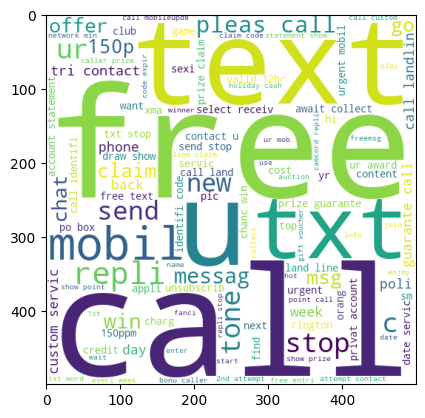

In [46]:
plt.imshow(spam_wc)
plt.show()

In [47]:
ham_wc=wc.generate(df[df['target']==0]["transform_text"].str.cat(sep=" "))

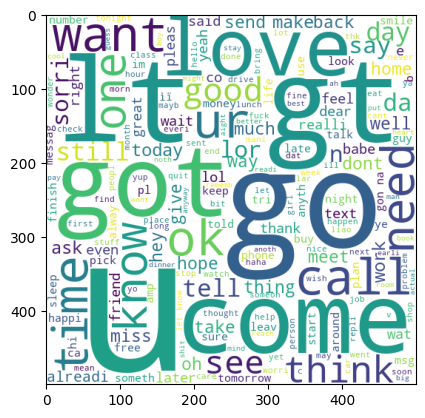

In [48]:
plt.imshow(ham_wc)
plt.show()

In [49]:
spamcorpus=[]
for msg in df[df['target']==1]["transform_text"].tolist():
    for word in msg.split():
        spamcorpus.append(word)
print(len(spamcorpus))

9939


In [50]:
hamcorpus=[]
for m in df[df['target']==0]["transform_text"].tolist():
    for w in m.split():
        hamcorpus.append(w)
print(len(hamcorpus))

35404


In [51]:
pip install collection

In [52]:
from collections import Counter
Counter(spamcorpus).most_common(10)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103)]

In [53]:
from collections import Counter
Counter(hamcorpus).most_common(10)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234)]

In [54]:
from collections import Counter
bar=pd.DataFrame(Counter(spamcorpus).most_common(15))
bar

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


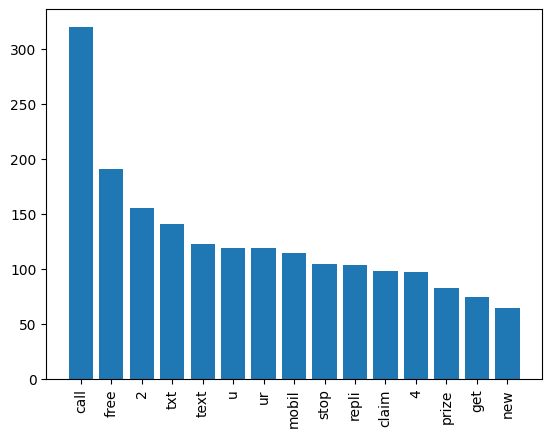

In [55]:
x=bar[0]
y=bar[1]
plt.bar(x,y)
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In [56]:
#pip install --upgrade scikit-learn

In [57]:
#pip install xgboost

In [58]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [59]:
svc=SVC(kernel='sigmoid', gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver="liblinear", penalty='11')
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
abc=AdaBoostClassifier(n_estimators=50, random_state=2)
bc=BaggingClassifier(n_estimators=50, random_state=2)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb=XGBClassifier(n_estimators=50, random_state=2)

In [60]:
clfs={"SVC":svc, "KN":knc, "NB":mnb, "DT":dtc, "LR":lrc, "RF":rfc, "AdaBoost":abc, "Bgc":bc, "ETC":etc, "GBDT":gbdt, "xgb":xgb }

In [61]:
def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred)
    return accuracy, precision

In [62]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [63]:
x=tfidf.fit_transform(df["transform_text"]).toarray()

In [64]:
x.shape

(5169, 6708)

In [65]:
y=df["target"].values

In [66]:
 from sklearn.model_selection import train_test_split

In [67]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=2)

In [68]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb=GaussianNB
mnb=MultinomialNB
bnb=BernoulliNB

In [69]:
train_classifier(etc, x_train, y_train, x_test, y_test)

(0.9729206963249516, 0.9824561403508771)

# Testing the model using user input.

In [70]:
st1=input("Enter your SMS here: ")
transformed_sms=transform_text(st1)
vector_input=tfidf.transform([transformed_sms])
result=etc.predict(vector_input)[0]
if result==1:
    print("Spam")
elif result==0:
    print("Not spam")

Enter your SMS here:  Congratulations! You've won a luxury vacation for two! 🌴🌞 Click here to claim your prize now! Limited time offer!


Spam
